## In this notebook I am summarising everything we have done in studteying the lepton jet reconstruction w.r.t various parameters such as $L_{xy}$ , $P_T$, $\eta$ of the $Z_d$, $\Delta R $ between lepton pairs, lepton $P_T$ etc. 

In [1]:
# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)

#plotting
import numpy as np
import matplotlib.pyplot as plt
utilities.set_plot_style()
import hist
from sidm.tools import histogram as h
importlib.reload(h)


<module 'sidm.tools.histogram' from '/home/cms-jovyan/SIDM/sidm/studies/lj_reco_efficiency/../../../sidm/tools/histogram.py'>

In [2]:
samples = [
    #"2Mu2E_100GeV_5GeV_40mm",
    #"2Mu2E_150GeV_5GeV_2p7mm",
    "2Mu2E_200GeV_0p25GeV_10mm",
    "2Mu2E_200GeV_5GeV_200mm",
    "2Mu2E_200GeV_5GeV_0p2mm",
    "2Mu2E_200GeV_5GeV_2mm",
    #"2Mu2E_500GeV_5GeV_0p8mm",
    #"2Mu2E_800GeV_5GeV_0p5mm",
    #"2Mu2E_1000GeV_5GeV_0p4mm",
    #"2Mu2E_1000GeV_5GeV_0p04mm",
    #"2Mu2E_1000GeV_5GeV_20mm",
    #"2Mu2E_100GeV_1p2GeV_9p6mm",
    #"2Mu2E_1000GeV_5GeV_40mm",
   # "2Mu2E_1000GeV_5GeV_4mm",
    
]
fileset = utilities.make_fileset(samples, "ffntuple_v4")

Here we are considering all the selections we created so far in the lepton jet efficiency studies. That include <br>
1) A selection with all the samples included.<br>
2) one with atleast 2 ljs. <br>
3) Dark Photon $P_T > 30$ GeV.  <br>
4) Select E-type from EGamma Type lepton jet into e-type. <br>
5) Select $\gamma$-type from EGamma Type <br>
6) Select DSA Muon from Muon LJ. <br>
7) Select PF muon from Muon LJ. <br>
8) Select $Z_d$ with $L_{xy} < 10 cm$. <br> 
9) Select $Z_d$ with $ 10 cm < L_{xy} < 100 cm$. <br> 
10) Select $Z_d$ with $L_{xy} >100 cm $. <br> 
11) Select $Z_d$ with $L_{xy} < 150 cm$. This is applied mainly to Dark Photons decaying to Electrons. <br> 
12) Select $Z_d$ with $L_{xy} < 250 cm$. This is applied mainly to Dark Photons decaying to Muons. <br> 

In [3]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=2,
    )

p = sidm_processor.SidmProcessor(
    [
        "baseNoLj",
        "2mu2e",
        "baseNoLj_highPtA",
        "baseNoLj_eLj",
        "baseNoLj_gLj", 
        "baseNoLj_dsaMuLj",
        "baseNoLj_pfMuLj",
        "baseNoLj_promptA",
        "baseNoLj_displacedA", 
        "baseNoLj_veryDisplacedA",
        "baseNoLj_lowLxyA",
        "baseNoLj_Lxy_upto250A"
        
        
        
    ],
    ["gen_base"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

Not applying any cuts to the lepton jets for channel  baseNoLj

Not applying any cuts to the lepton jets for channel  baseNoLj_highPtA

Not applying any cuts to the lepton jets for channel  baseNoLj_promptA

Not applying any cuts to the lepton jets for channel  baseNoLj_displacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_veryDisplacedA

Not applying any cuts to the lepton jets for channel  baseNoLj_lowLxyA

Not applying any cuts to the lepton jets for channel  baseNoLj_Lxy_upto250A

## Pt distribution with Lxy cut

#### Here I show the LJ-reco efficiency w.r.t  Dark Photon PT plot with and with out the Lxy cut for the 0.25 GeV dark Photon and 5 GeV Dark Photon, for the two categories: One which decays to muons and one which decays to electron. For the dark phototn decaying to electron we are applying the $L_{xy}$ < 150 cm and for the dark photon decaying to muons, we are applying $L_{xy}$ < 250 cm cuts.

In [4]:
ch1= "baseNoLj"
ch2= "baseNoLj_lowLxyA"
ch3= "baseNoLj_Lxy_upto250A"

## 0.25 GeV

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404f6b370>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404ec1970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9404f6b3d0>, errorbar=<ErrorbarContainer object of 3 artists>))

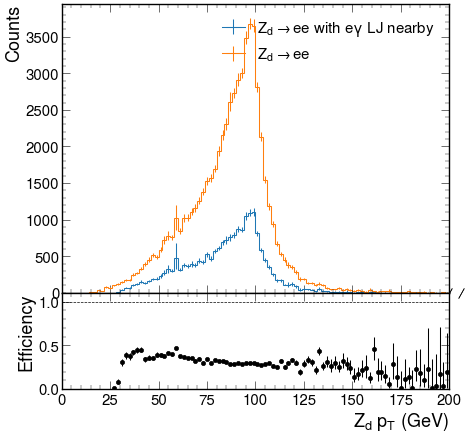

In [5]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_pt"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f941c108640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940796de80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f941c108b20>, errorbar=<ErrorbarContainer object of 3 artists>))

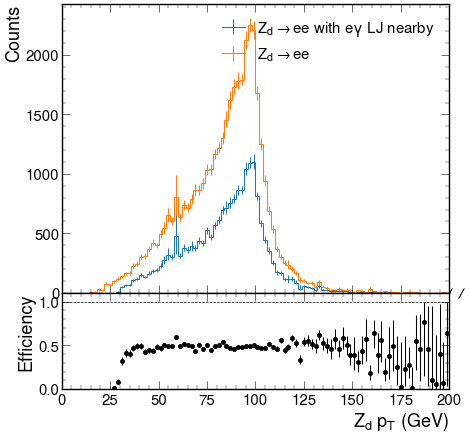

In [6]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_pt"][ch2,:], 
        rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9405d53310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9407166400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f941c476d00>, errorbar=<ErrorbarContainer object of 3 artists>))

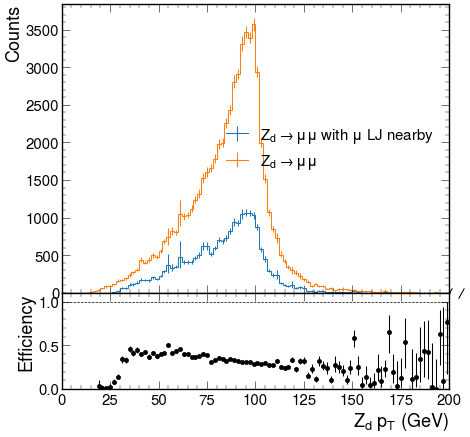

In [7]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_pt"][ch1,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm baseNoLj")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94074524f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9406295850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9407519c70>, errorbar=<ErrorbarContainer object of 3 artists>))

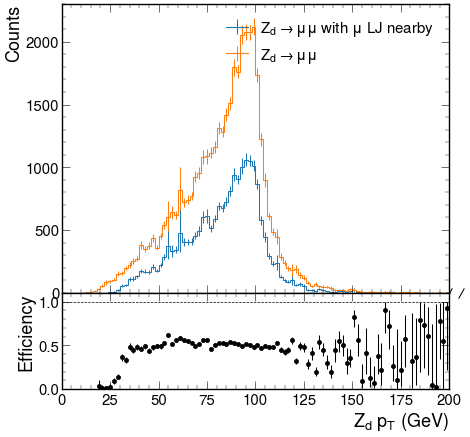

In [8]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_pt"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

## 5 GeV 

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9406cc6fa0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9406e601c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9406cc6f40>, errorbar=<ErrorbarContainer object of 3 artists>))

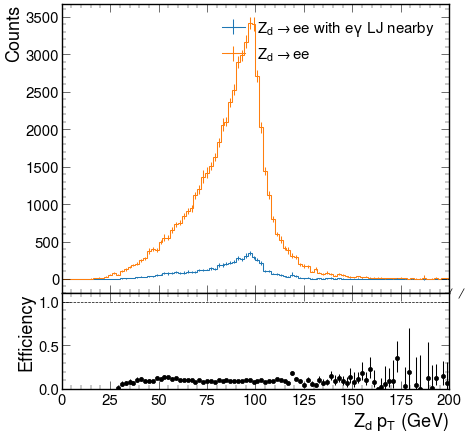

In [9]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_pt"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404afb2e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404ab70d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9404af0f40>, errorbar=<ErrorbarContainer object of 3 artists>))

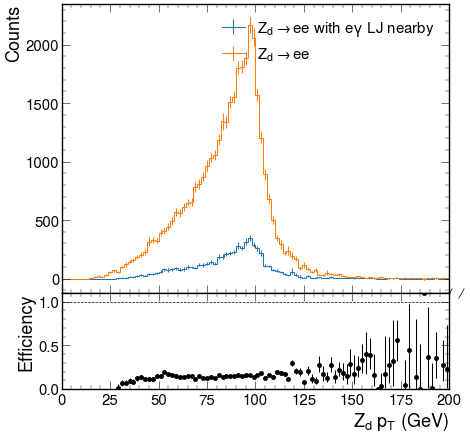

In [10]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_pt"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_pt"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency",
       )

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9406d2a4f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940629aa90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f940759a550>, errorbar=<ErrorbarContainer object of 3 artists>))

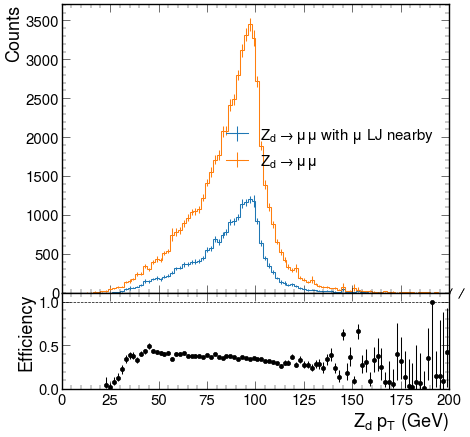

In [11]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_pt"][ch1,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9427a3e910>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94077e26a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f94076ac2e0>, errorbar=<ErrorbarContainer object of 3 artists>))

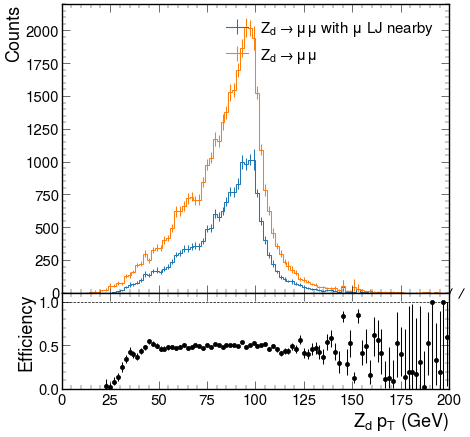

In [12]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_pt"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_pt"][ch3,:], 
        rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

1) After the cut is applied, we see that the efficiency become stabel for both egamma case and muon case.  <br>
2) FOr the 5 GeV electron , we see lower efficiency for electron type compared to 0.25 GeV 

## Lxy Distribution with Pt cut

In [13]:
ch1= "baseNoLj"
ch2= "baseNoLj_highPtA"
ch3= "baseNoLj_eLj"
ch4= "baseNoLj_gLj" 
ch5= "baseNoLj_dsaMuLj"
ch6= "baseNoLj_pfMuLj"

Here we are considering applying the cut of $P_T > 30$ Gev to Dark Photon. Also we consider both 0.25 GeV and 5 GeV dark photon masses. Also we are separating the muon lj to dsa and pf muons as well as Egamma type into e type and $\gamma$ type.

### 0.25 Gev

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9406d878b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9407785370>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f941c0ac520>, errorbar=<ErrorbarContainer object of 3 artists>))

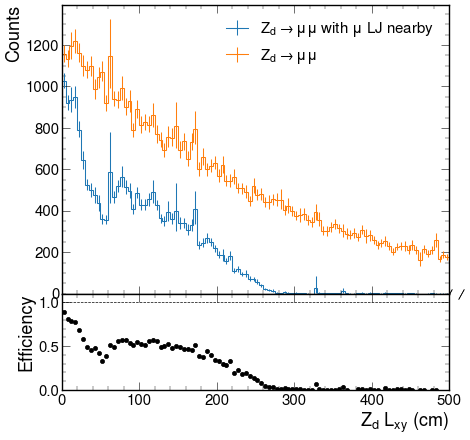

In [14]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f941c0f2a60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9407cc5af0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f941c0f2430>, errorbar=<ErrorbarContainer object of 3 artists>))

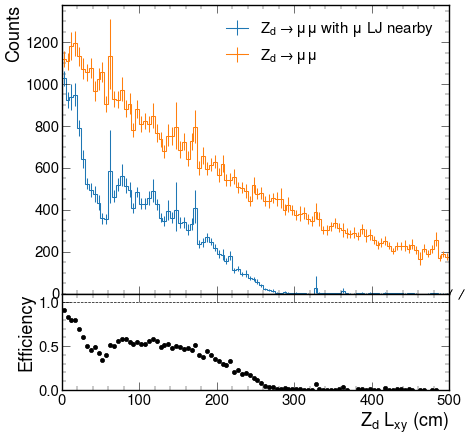

In [15]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940473ec10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940481e070>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f940473ea30>, errorbar=<ErrorbarContainer object of 3 artists>))

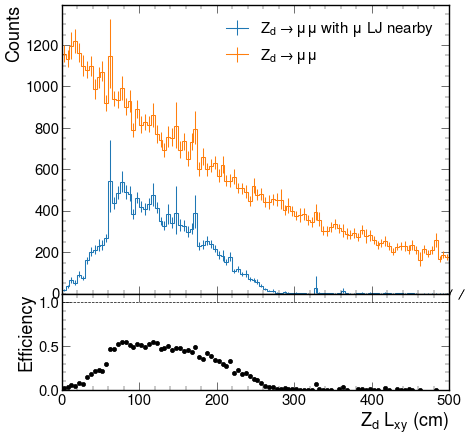

In [16]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch5,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch5,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94044cfa30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404483040>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f94044cf9d0>, errorbar=<ErrorbarContainer object of 3 artists>))

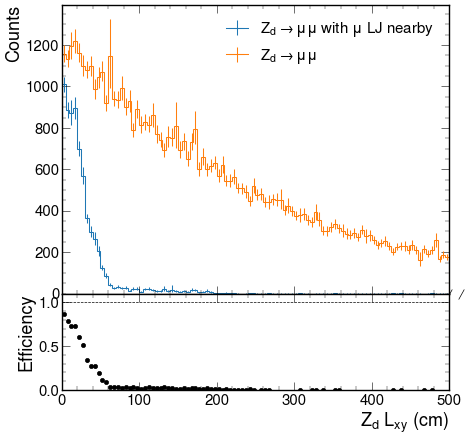

In [17]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch6,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_lxy"][ch6,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94045ff6a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f94042294c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f9404342880>, errorbar=<ErrorbarContainer object of 3 artists>))

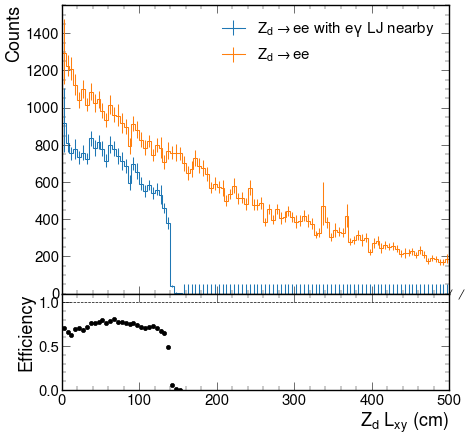

In [18]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940405fee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f940440c8e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f940405feb0>, errorbar=<ErrorbarContainer object of 3 artists>))

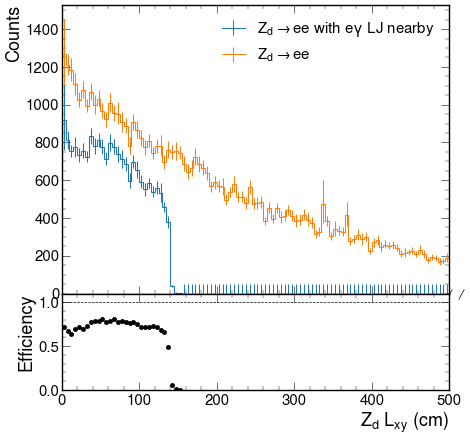

In [19]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f7d14b80>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f7ccb430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f94040653d0>, errorbar=<ErrorbarContainer object of 3 artists>))

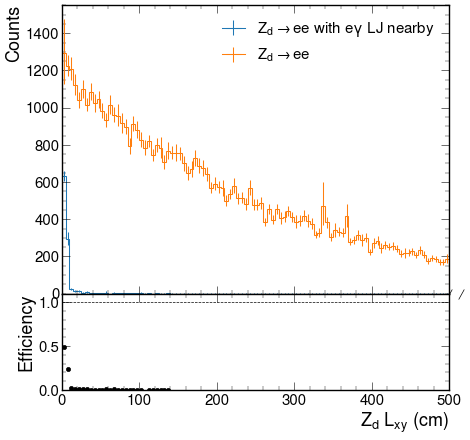

In [20]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f7a4f880>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f7a032e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f7a4f7f0>, errorbar=<ErrorbarContainer object of 3 artists>))

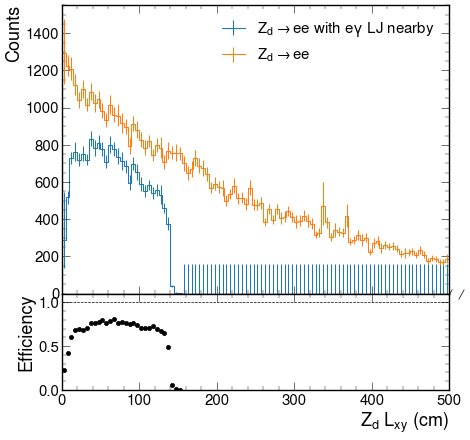

In [21]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_lxy"][ch4,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

### 5 Gev 

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f77fa310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f77b18b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f77fa520>, errorbar=<ErrorbarContainer object of 3 artists>))

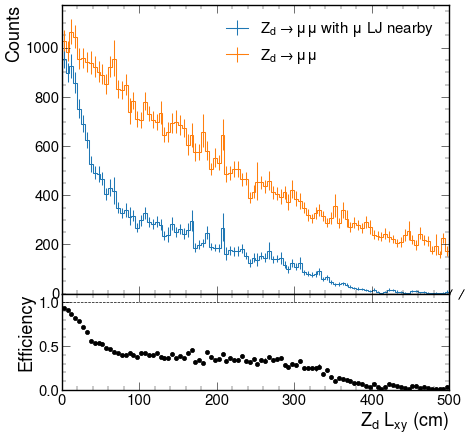

In [22]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f7525610>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f74e1490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f7573a00>, errorbar=<ErrorbarContainer object of 3 artists>))

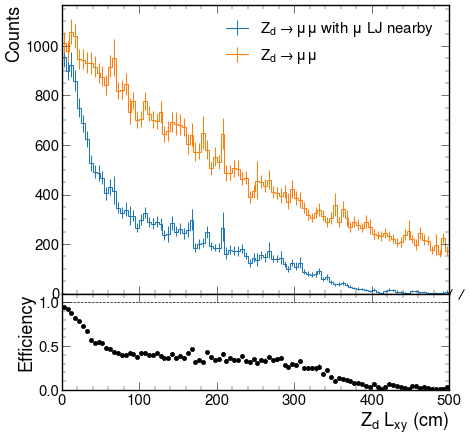

In [23]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f73ffe50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f72150d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f73ffd90>, errorbar=<ErrorbarContainer object of 3 artists>))

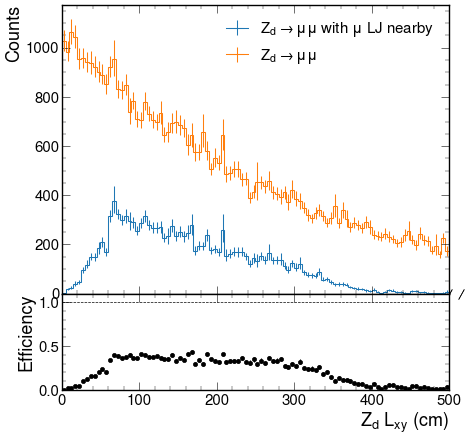

In [24]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch5,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch5,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6f821c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6fb1d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f6fb1df0>, errorbar=<ErrorbarContainer object of 3 artists>))

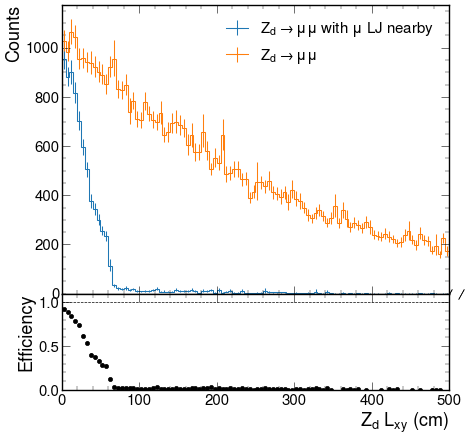

In [25]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_lxy"][ch6,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_lxy"][ch6,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
#plt.title("2Mu2E_200GeV_0p25GeV_10mm")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6d2e5b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6ce42e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f6d2e520>, errorbar=<ErrorbarContainer object of 3 artists>))

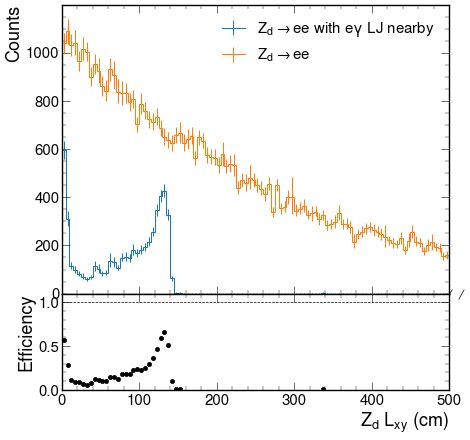

In [26]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6a5c190>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6b05100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f6a5c700>, errorbar=<ErrorbarContainer object of 3 artists>))

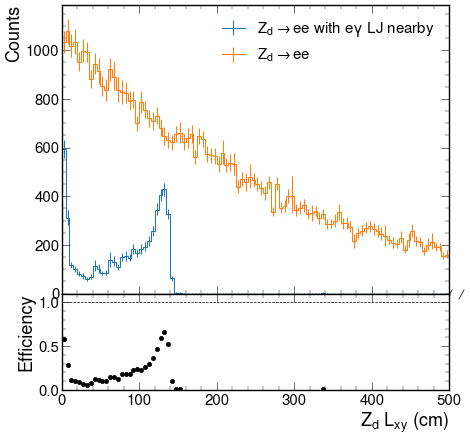

In [27]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch2,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch2,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9404303310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f9407544340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f940759a5e0>, errorbar=<ErrorbarContainer object of 3 artists>))

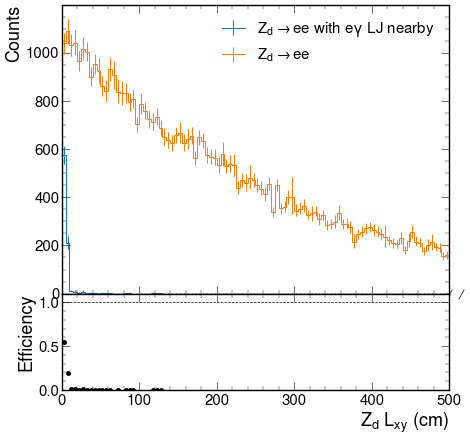

In [28]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch3,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch3,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f662ed00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6580310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f662edf0>, errorbar=<ErrorbarContainer object of 3 artists>))

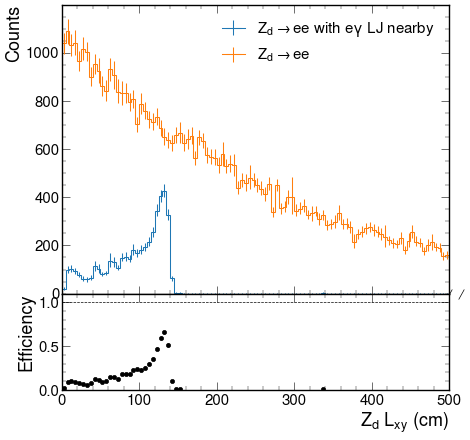

In [29]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_lxy"][ch4,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_lxy"][ch4,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

1) Clear difference between 0.25 and 5 GeV cases. <br>
2) When we separate the Egamma type into electron type, electron contribute to lower values of Lxy and Photon to higher values of Lxy and stops at when the ECal ends.. <br>
3) When we separate muon type into PF and DSA muons, PF takes lowere values of Lxy and then DSA slowly catches up

## In this section, we are going to look at the lepton jet reconstruction efficiency w.r.t dark photon $\eta$. We look at both higly colllimated and least collimated cases.

### 0.25 Gev

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6361580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6305340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f6361670>, errorbar=<ErrorbarContainer object of 3 artists>))

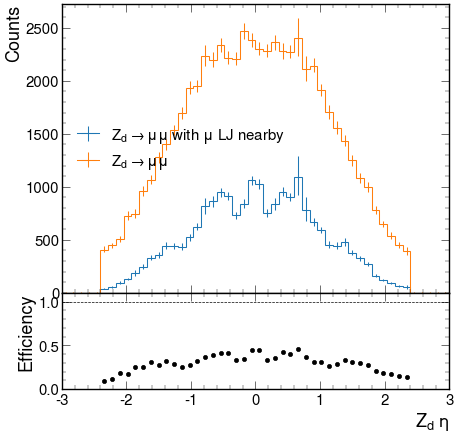

In [30]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toMu_matched_muLj_eta"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toMu_eta"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f621dcd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f6230430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f6230100>, errorbar=<ErrorbarContainer object of 3 artists>))

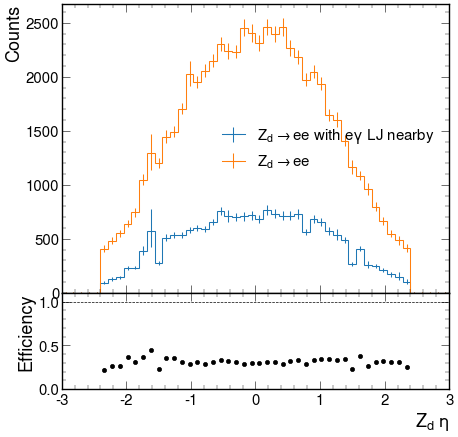

In [31]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genA_toE_matched_egmLj_eta"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_0p25GeV_10mm"]["hists"]["genAs_toE_eta"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

### 5 Gev

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f5e21b20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f5e2a070>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f5e2af10>, errorbar=<ErrorbarContainer object of 3 artists>))

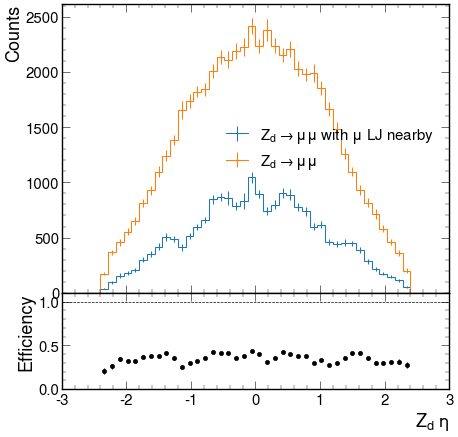

In [32]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toMu_matched_muLj_eta"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toMu_eta"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow \mu\mu $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

(([StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f5baef70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
  [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f93f5b58310>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]),
 RatioErrorbarArtists(line=<matplotlib.lines.Line2D object at 0x7f93f5baeee0>, errorbar=<ErrorbarContainer object of 3 artists>))

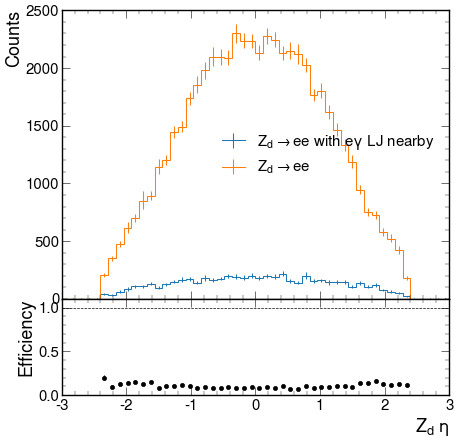

In [33]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genA_toE_matched_egmLj_eta"][ch1,:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_200mm"]["hists"]["genAs_toE_eta"][ch1,:], 
       rp_num_label=r"$Z_d \rightarrow ee$ with $e\gamma$ LJ nearby",
       rp_denom_label=r"$Z_d \rightarrow ee $",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")

1) Differences in shapes for muon type and electron type. <br>
2) For electron type the efficiency is low in 5 GeV case. <br>

## In this section we look at the lepton jet reconstruction efficiency w.r.t $\Delta R$ between lepton pairs for highly collimated and less collimated cases. Here we consider the ration between 2mu2e selection and baseNoLj selection.

### 5GeV 

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_0p2mm')

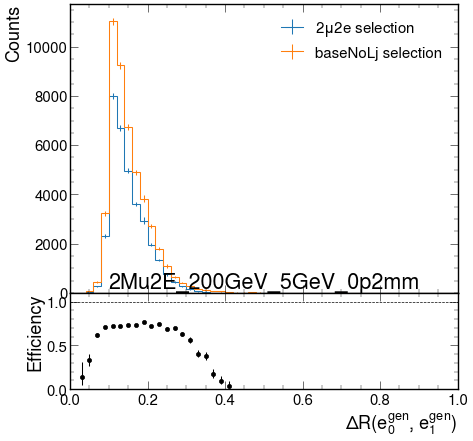

In [34]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_0p2mm"]["hists"]["genE_genE_dR"]["2mu2e",:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_0p2mm"]["hists"]["genE_genE_dR"]["baseNoLj",:], 
       rp_num_label=r"2$\mu$2e selection",
       rp_denom_label="baseNoLj selection",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_0p2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_0p2mm')

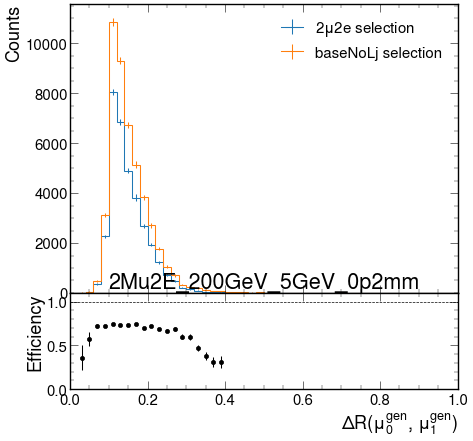

In [35]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_0p2mm"]["hists"]["genMu_genMu_dR"]["2mu2e",:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_0p2mm"]["hists"]["genMu_genMu_dR"]["baseNoLj",:], 
       rp_num_label=r"2$\mu$2e selection",
       rp_denom_label="baseNoLj selection",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_0p2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

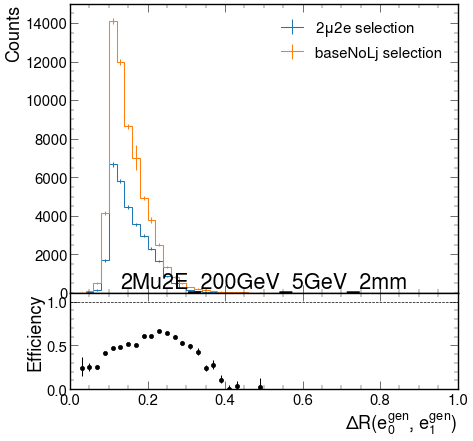

In [36]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"]["2mu2e",:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_genE_dR"]["baseNoLj",:], 
       rp_num_label=r"2$\mu$2e selection",
       rp_denom_label="baseNoLj selection",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

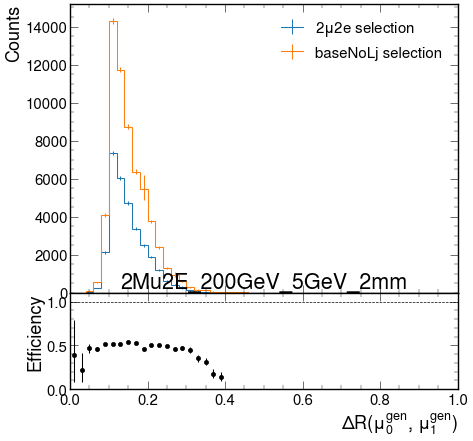

In [37]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"]["2mu2e",:].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_genMu_dR"]["baseNoLj",:], 
       rp_num_label=r"2$\mu$2e selection",
       rp_denom_label="baseNoLj selection",
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

1) Clear differences for electron and muon cases. For electron we see a peak, and for muon, it is more constant.

## In this section we look at the lepton jet reconstruction w.r.t lepton Pt 

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

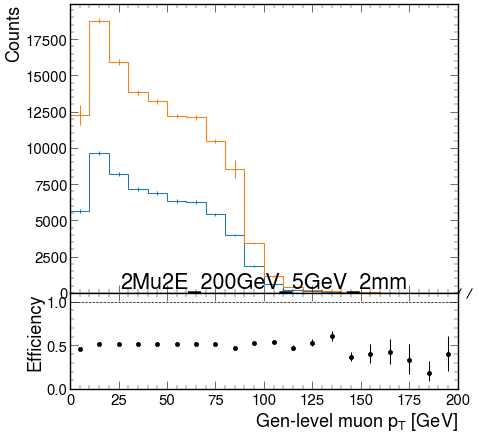

In [38]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_pt_highRange"]["2mu2e",:200j].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genMu_pt_highRange"]["baseNoLj",:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")

Text(0.5, 1.0, '2Mu2E_200GeV_5GeV_2mm')

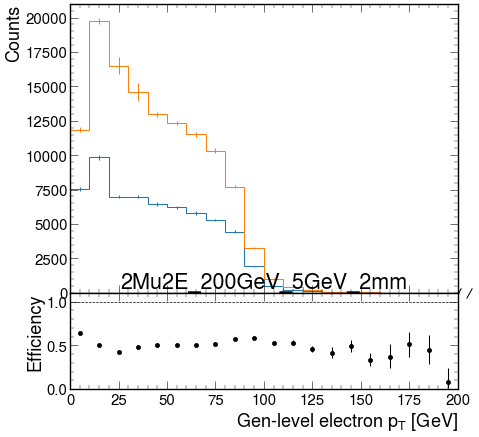

In [39]:
plt.figure(figsize=(10,10))
output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_pt_highRange"]["2mu2e",:200j].plot_ratio(
       output["out"]["2Mu2E_200GeV_5GeV_2mm"]["hists"]["genE_pt_highRange"]["baseNoLj",:200j], 
       rp_uncert_draw_type="line",
       rp_uncertainty_type="efficiency")
plt.title("2Mu2E_200GeV_5GeV_2mm")